<a href="https://colab.research.google.com/github/Natalia-git97/Brent-Oil-Times-series/blob/main/Brent_Oil_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
!pip install pmdarima
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.animation import FuncAnimation
from math import sqrt
import seaborn as sns
sns.set_context("paper")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving BrentOilPrices.csv to BrentOilPrices (1).csv


In [ ]:
data = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')
data_teste = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'])
data_teste

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


In [ ]:
#armazenando informação para plotar grafico após predição
teste_data = data_teste.loc[(data_teste['Date'] >='2019-01-01')]
teste_data = treino_data.reset_index()
del teste_data['index']
teste_data.head()

,Date,Price
0,2019-01-02,54.06
1,2019-01-03,53.23
2,2019-01-04,55.64
3,2019-01-07,57.10
4,2019-01-08,56.91


In [ ]:
treino_data.shape

(530, 2)

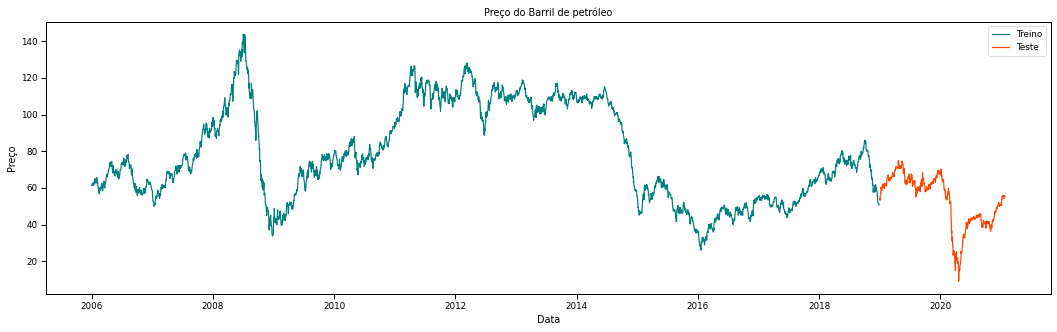

In [ ]:
treino = data.loc['2006-01-01':'2018-12-31']
teste = data.loc['2019-01-01':]
plt.figure(figsize=(18,5))
plt.title('Preço do Barril de petróleo')
plt.plot(treino['Price'], color='teal')
plt.plot(teste['Price'], color='orangered')
plt.legend(['Treino','Teste'])
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()


In [ ]:
#criando uma função para plotar o gráfico e mostrar o resultado do teste:
def checar_estacionariedade(y, lags_plots=48, figsize=(22,8)):
    "Use Series como parâmetro"
    
    # Criando plots do DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize, color='teal')
    ax1.set_title('Série de Preços')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2, color='teal');
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3, method='ols', color='teal');
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4, color='teal')
    ax4.set_title('Distribuição dos Preços')

    plt.tight_layout()
    
    print('Resultados do teste de Dickey-Fuller:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Teste Statistico','Valor-P','Lags Usados','Números de Observações'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Valores Críticos (%s)"%key] = value.round(4)
        
    print(adftest)

Resultados do teste de Dickey-Fuller:
Teste Statistico            -1.6212
Valor-P                      0.4721
Lags Usados                  1.0000
Números de Observações    3281.0000
Valores Críticos (1%)       -3.4323
Valores Críticos (5%)       -2.8624
Valores Críticos (10%)      -2.5672
dtype: float64


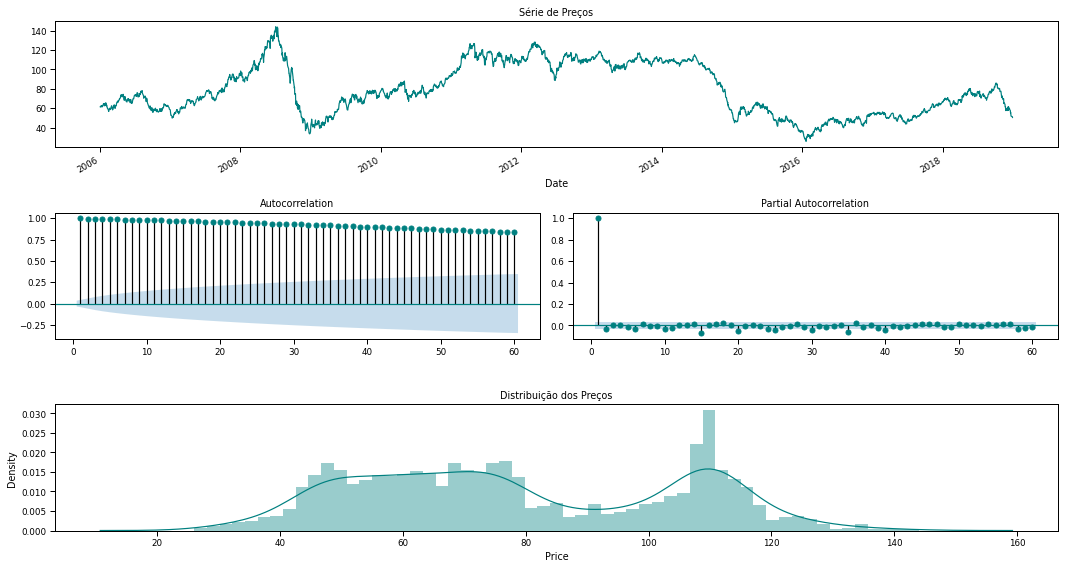

In [ ]:
checar_estacionariedade(treino['Price'], lags_plots=60)

Resultados do teste de Dickey-Fuller:
Teste Statistico           -55.3968
Valor-P                      0.0000
Lags Usados                  0.0000
Números de Observações    3281.0000
Valores Críticos (1%)       -3.4323
Valores Críticos (5%)       -2.8624
Valores Críticos (10%)      -2.5672
dtype: float64


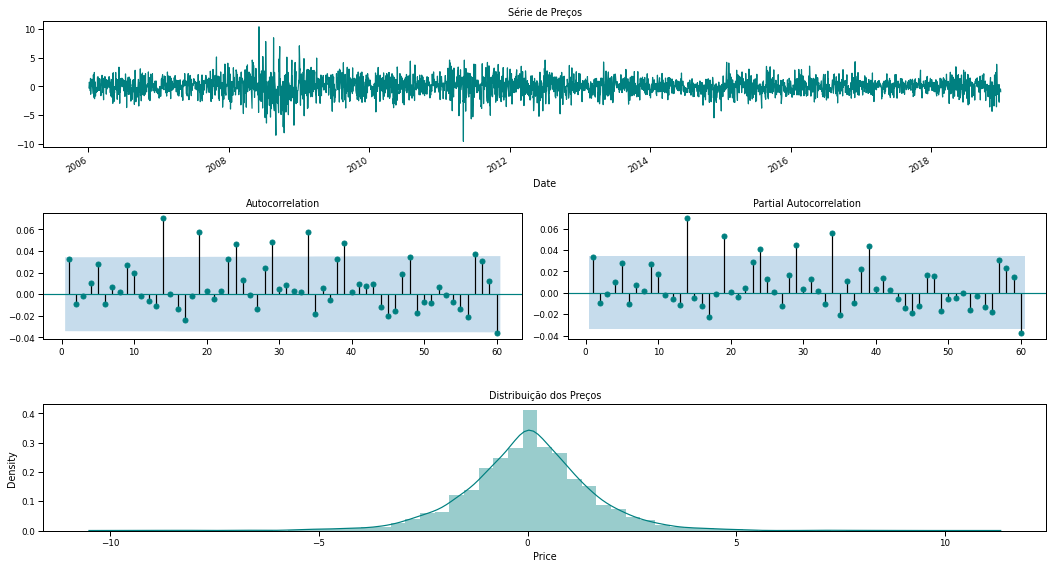

In [ ]:
checar_estacionariedade(treino['Price'].diff().dropna(), lags_plots=60)

In [ ]:
# Treinando o modelo
modelo = ARIMA(treino, order=(2,2,2)).fit()
pred_treino = modelo.predict()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Price   No. Observations:                 3281
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -5989.861
Method:                       css-mle   S.D. of innovations              1.500
Date:                Wed, 30 Jun 2021   AIC                          11991.721
Time:                        18:32:46   BIC                          12028.297
Sample:                             2   HQIC                         12004.817
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.549e-05   2.86e-05     -0.891      0.373   -8.16e-05    3.06e-05
ar.L1.D2.Price    -0.9551      0.022    -42.775      0.000      -0.999      -0.911
ar.L2.D2.Price     0.0346      0.017      1.983      0.047       0.000       0.069
ma.L1.D2.Price    -0.0117      0.014     -0.833      0.405      -0.039       0.016
ma.L2.D2.Price    -0.9883      0.014    -70.574      0.000      -1.016      -0.961
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0100           +0.0000j            1.0100            0.5000
AR.2           28.5925           +0.0000j           28.5925            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0118           +0.0000j            1.0118            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pred_treino[:5]


Date
2006-01-05   -0.000025
2006-01-06   -0.334286
2006-01-09   -0.428673
2006-01-10    0.158167
2006-01-11    0.335058
dtype: float64

In [ ]:
pred_treino = pred_treino*-1

In [ ]:
# Voltando para a base de preços em R$/m3
pred_treino[0] += treino.iloc[0,0]
pred_treino = np.cumsum(pred_treino)
pred_treino.head()

Date
2006-01-05    61.510025
2006-01-06    61.844312
2006-01-09    62.272985
2006-01-10    62.114818
2006-01-11    61.779761
dtype: float64

In [ ]:
treino['Pred ARIMA'] = pred_treino
treino.dropna(inplace=True)
treino.head()

,Price,Pred ARIMA
Date,,
2006-01-05,61.68,61.510025
2006-01-06,62.43,61.844312
2006-01-09,62.51,62.272985
2006-01-10,62.32,62.114818
2006-01-11,61.54,61.779761


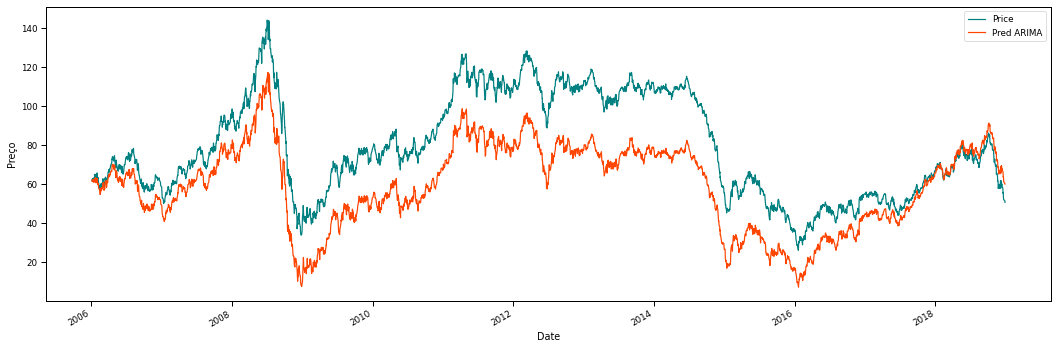

In [ ]:
# Plotando o gráfico
treino.plot(figsize=(18,6), 
            color=['Teal','orangered'])
plt.ylabel('Preço')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(treino['Price'], treino['Pred ARIMA'])
print("ARIMA MAE:", mae)
mse = mean_squared_error(treino['Price'], treino['Pred ARIMA'])
print("ARIMA MSE:", mse)
rmse = np.sqrt(mse)
print("ARIMA RMSE:", rmse)
r2 = r2_score(treino['Price'], treino['Pred ARIMA'])
print("ARIMA R2:", r2)

ARIMA MAE: 20.410943402837432
ARIMA MSE: 528.8348472221292
ARIMA RMSE: 22.996409441957002
ARIMA R2: 0.20020958987869608


In [ ]:
data_pred = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')
data_pred = data_pred.loc['2006-01-01':]


In [ ]:
X = data_pred.values

In [ ]:
size = int(len(X) * 0.8612)
train, test = X[0:size], X[size:len(X)]
test.shape

(530, 1)

In [ ]:
history = [x for x in train]
predictions = list()
n=0
for t in range(len(test)):
    model = ARIMA(history, order=(2,2,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    n = n+1
    print('=%f, predicted=%f, expected=%f' % (n, yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

=1.000000, predicted=50.487457, expected=54.060000
=2.000000, predicted=54.140561, expected=53.230000
=3.000000, predicted=53.161742, expected=55.640000
=4.000000, predicted=55.677698, expected=57.100000
=5.000000, predicted=57.115978, expected=56.910000
=6.000000, predicted=56.864536, expected=59.460000
=7.000000, predicted=59.511517, expected=60.470000
=8.000000, predicted=60.472179, expected=59.240000
=9.000000, predicted=59.166598, expected=58.800000
=10.000000, predicted=58.750389, expected=58.650000
=11.000000, predicted=58.612538, expected=59.810000
=12.000000, predicted=59.813633, expected=59.850000
=13.000000, predicted=59.821899, expected=62.040000
=14.000000, predicted=62.082026, expected=62.180000
=15.000000, predicted=62.161255, expected=60.900000
=16.000000, predicted=60.820643, expected=61.050000
=17.000000, predicted=61.028638, expected=61.090000
=18.000000, predicted=61.056200, expected=61.490000
=19.000000, predicted=61.476656, expected=59.710000
=20.000000, predicted

In [ ]:
test_pred = pd.DataFrame(predictions, columns=['Pred'])
test_pred

,Pred
0,50.487457
1,54.140561
2,53.161742
3,55.677698
4,57.115978
...,...
525,54.178507
526,55.372747
527,55.642784
528,55.650773


In [ ]:
teste_data['Pred ARIMA'] = test_pred
teste_data.set_index('Date', inplace=True)
teste_data

,Price,Pred ARIMA
Date,,
2019-01-02,54.06,50.487457
2019-01-03,53.23,54.140561
2019-01-04,55.64,53.161742
2019-01-07,57.10,55.677698
2019-01-08,56.91,57.115978
...,...,...
2021-01-19,55.38,54.178507
2021-01-20,55.66,55.372747
2021-01-21,55.68,55.642784


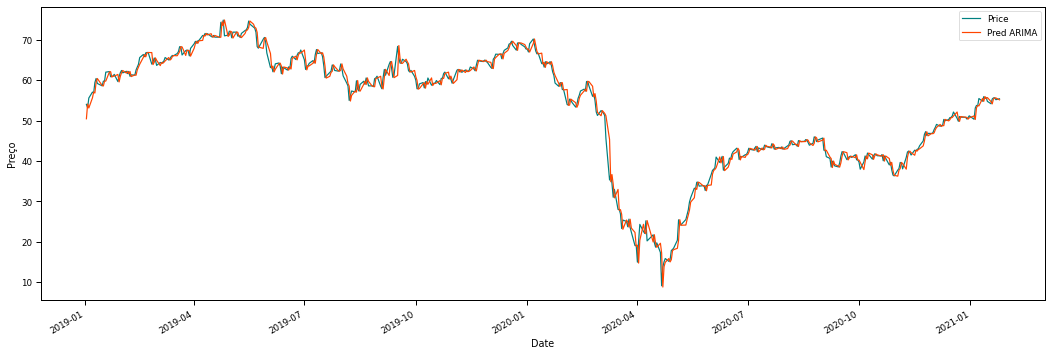

In [ ]:
teste_data.plot(figsize=(18,6), 
            color=['Teal','orangered'])
plt.ylabel('Preço')
plt.show()

In [ ]:
mae = mean_absolute_error(teste_data['Price'], teste_data['Pred ARIMA'])
print("ARIMA MAE:", mae)
mse = mean_squared_error(teste_data['Price'], teste_data['Pred ARIMA'])
print("ARIMA MSE:", mse)
rmse = np.sqrt(mse)
print("ARIMA RMSE:", rmse)
r2 = r2_score(teste_data['Price'], teste_data['Pred ARIMA'])
print("ARIMA R2:", r2)

ARIMA MAE: 1.040692547537601
ARIMA MSE: 2.255988882790562
ARIMA RMSE: 1.5019949676315703
ARIMA R2: 0.9886453444300686
